In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [3]:
cares = pd.read_csv("../data/CARES_encoded.csv")
cares

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,0.0,0,1,0,0
1,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,0.0,0.0,0,1,0,0
2,0,NaN,1.0,152.538570,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
3,1,NaN,2.0,117.231496,NaN,0.0,1.0,0.0,1.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
4,1,0.0,1.0,98.651255,59.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,0,2.0,1.0,48.339582,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,2.0,0.0,1.0,0,0,0,0
90781,1,1.0,2.0,126.592489,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,0.0,0.0,NaN,0,0,0,0
90782,0,NaN,0.0,86.306771,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,1.0,0.0,NaN,0,0,0,0
90783,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,1.0,0,1,0,0


In [4]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [6]:
# features are those that are continuous
days_significant_columns = [
    'RCRI score',
    'PreopEGFRMDRD',
    'Preoptransfusionwithin30days',
    'Intraop',
    'Postopwithin30days',
    'Transfusionintraandpostop'
]

days_cares = cares[days_significant_columns + ['DaysbetweenDeathandoperation']]

In [7]:
days_cares = days_cares.dropna(how='any')

In [8]:
days_cares.shape

(3401, 7)

In [11]:
days_cares.head()

,RCRI score,PreopEGFRMDRD,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,DaysbetweenDeathandoperation
4,0.0,98.651255,0.0,0.0,0.0,0.0,59.0
108,0.0,107.520574,0.0,0.0,0.0,0.0,433.0
109,1.0,104.801171,0.0,0.0,0.0,0.0,1032.0
188,1.0,56.149704,0.0,1.0,0.0,1.0,212.0
230,1.0,129.079606,0.0,0.0,0.0,0.0,155.0


In [12]:
days_cares["DaysbetweenDeathandoperation"].isna().value_counts()

DaysbetweenDeathandoperation
False    3401
Name: count, dtype: int64

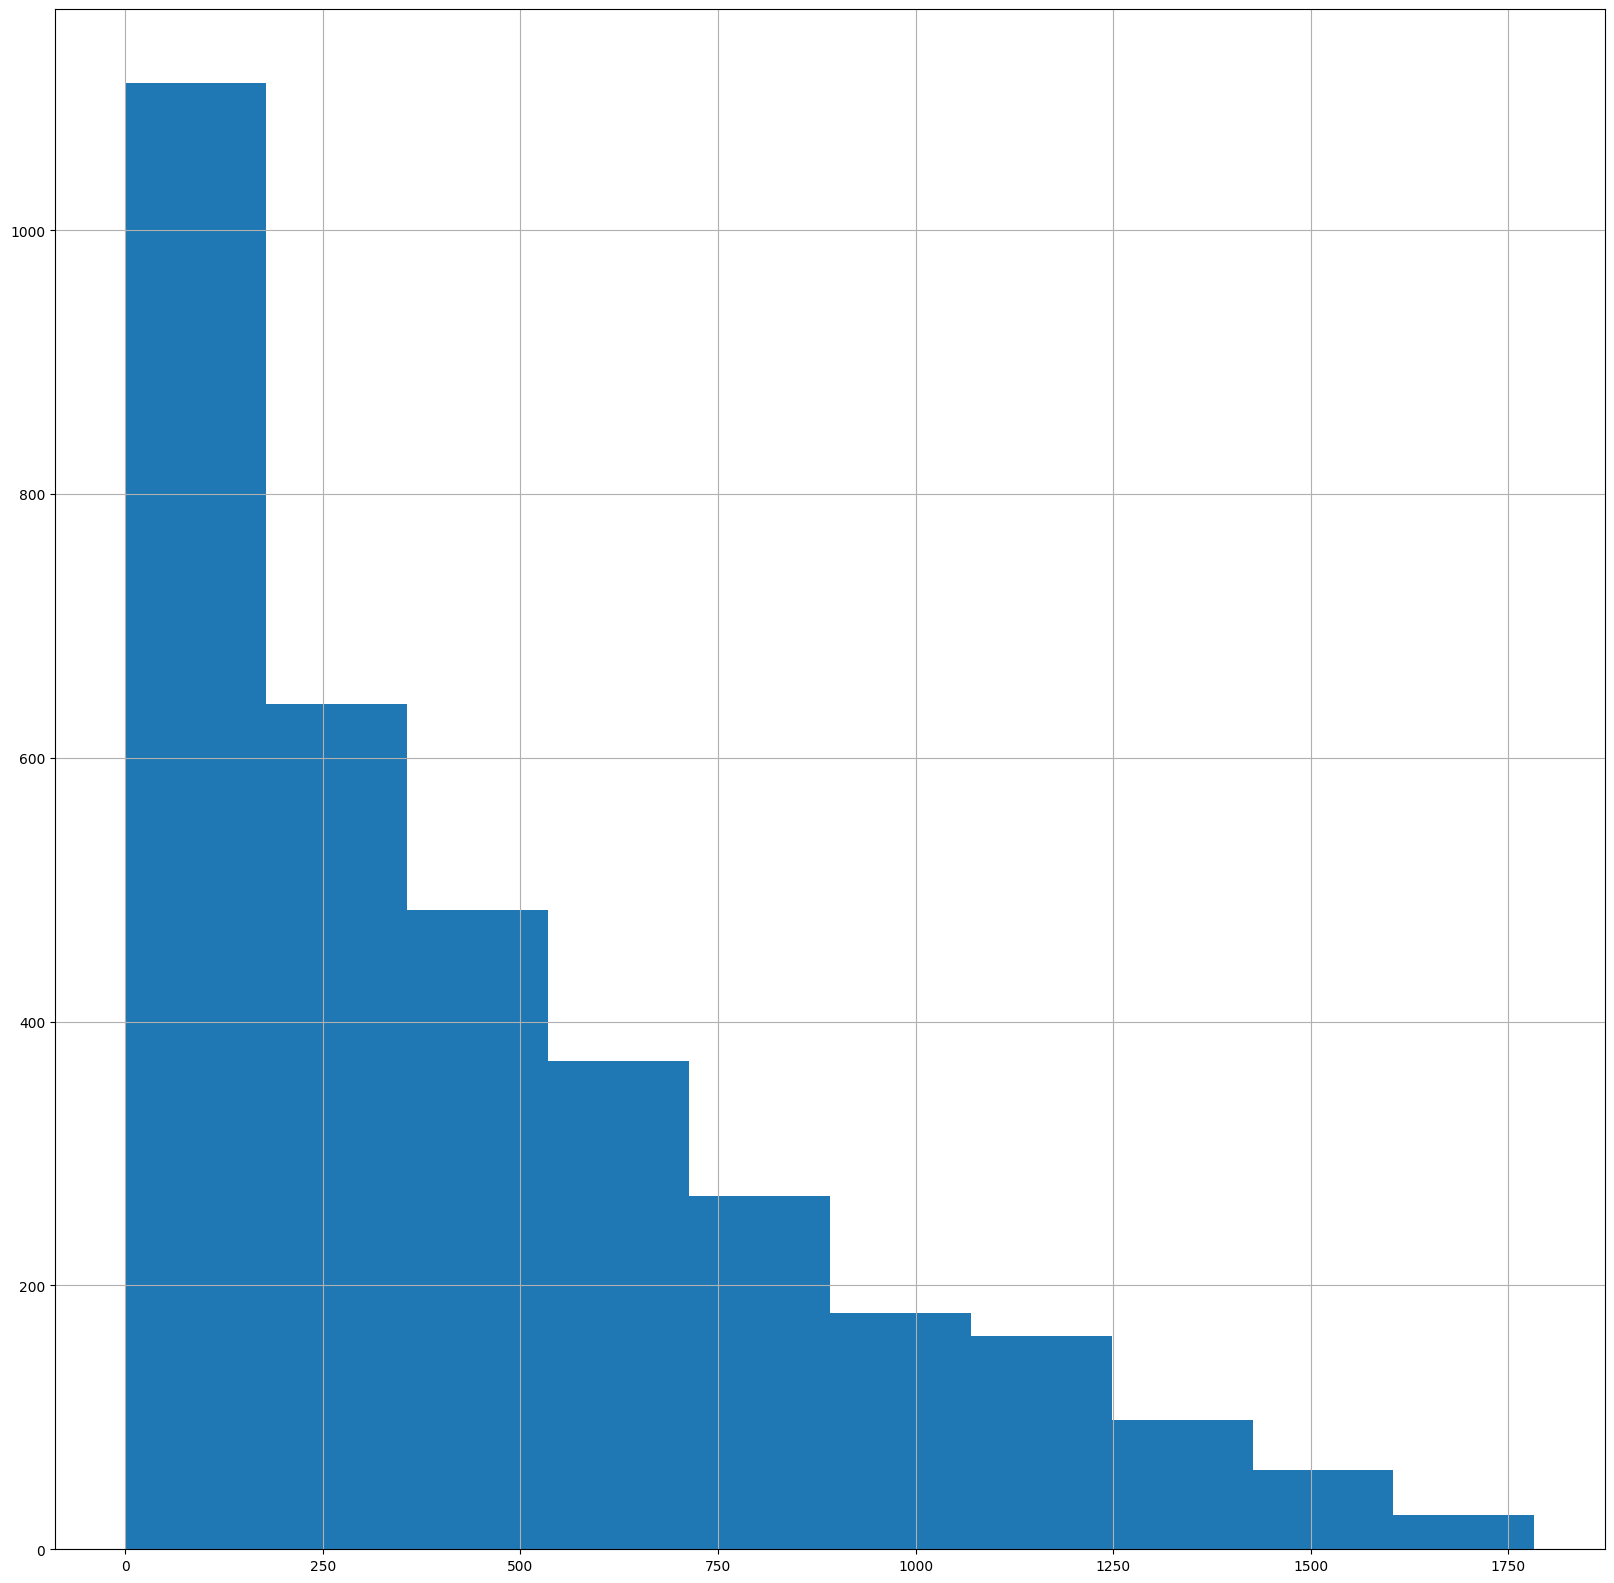

In [13]:
p = days_cares["DaysbetweenDeathandoperation"].hist(figsize=(20,20))

# Simple Modeling (lin reg, DT reg, ridge, lasso)

In [14]:
RANDOM_SEED = 623

In [15]:
np.random.seed(RANDOM_SEED)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import tree, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
X = days_cares.drop('DaysbetweenDeathandoperation', axis=1)
y = days_cares['DaysbetweenDeathandoperation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [43]:
# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2380, 6)
Shape of y_train: (2380,)
Shape of X_test: (1021, 6)
Shape of y_test: (1021,)


In [47]:
# Feature engineer the generated data X by adding polynomial features of degree N
# Initialise a list of degrees 
list_deg = [1, 3, 6, 9]
# Initial number of predicted values
num_points = 1021
# Initialise the 2D array to store the predicted values
degree_predictions = np.zeros((len(list_deg), num_points))

# Initialise lists to store MSE and R² values for each degree
mae_list = []
mse_list = []
r2_list = []

for i, N in enumerate(list_deg):
    # Initialise the polynomial feature transformer 
    poly = PolynomialFeatures(degree=N)
    
    # Fits and transforms the input train data and creates new features of degree N
    X_train_ = poly.fit_transform(X_train)
    
    # Instantiate a linear regressor
    linreg = LinearRegression()
    
    # Train the linear regressor with X_train data with polynomial features added of degree N
    linreg.fit(X_train_, y_train)
    
    # Transform the test data to include polynomial features of the same degree
    X_test_ = poly.fit_transform(X_test)
    
    # Store the predicted values on the ith row
    y_pred = linreg.predict(X_test_)
    degree_predictions[i, :] = y_pred
    
    # Calculate and store the MSE and R² values
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)
    
    # Print MSE and R² for the current degree
    print(f"Degree {N}: MAE = {mae:.4f}, Degree {N}: MSE = {mse:.4f}, R² = {r2:.4f}")

# degree_predictions now contains the predictions for each degree of polynomial features
degree_predictions

Degree 1: MAE = 322.0449, Degree 1: MSE = 155126.6133, R² = 0.0522
Degree 3: MAE = 325.5436, Degree 3: MSE = 158937.7924, R² = 0.0289
Degree 6: MAE = 4025.9658, Degree 6: MSE = 6546306388.5593, R² = -39996.5996
Degree 9: MAE = 1663.3757, Degree 9: MSE = 235823394.2854, R² = -1439.8690


array([[497.18230116, 426.71276728, 568.9340531 , ..., 460.50859462,
        378.07661664, 535.21187344],
       [505.93757647, 418.75829458, 605.6058498 , ..., 468.34632277,
        402.08745921, 552.70387381],
       [498.88701671, 445.09646216, 549.70255664, ..., 503.33829534,
        487.23951777, 501.40049654],
       [479.7339719 , 414.2127177 , 481.7833094 , ..., 462.04299261,
        478.77112322, 481.86371015]])

From polynomial regression, seems like degree 1 (lin reg) performs the best

In [46]:
# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict using the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation results
    print(f"\n{name} Evaluation:")
    print(f"Intercept: {model.intercept_}" if hasattr(model, 'intercept_') else "")
    print(f"Coefficient: {model.coef_}" if hasattr(model, 'coef_') else "")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")


Linear Regression Evaluation:
Intercept: 603.5847111227584
Coefficient: [-54.540234    -0.98155837 -29.14258324 -28.74222466   8.59122061
 -20.15100404]
Mean Absolute Error (MAE): 322.04
Mean Squared Error (MSE): 155126.61
Root Mean Squared Error (RMSE): 393.86
R-squared (R²): 0.05

Ridge Regression Evaluation:
Intercept: 603.5799304513371
Coefficient: [-54.53795674  -0.98154497 -29.14242254 -28.73668987   8.5875856
 -20.14910427]
Mean Absolute Error (MAE): 322.04
Mean Squared Error (MSE): 155126.66
Root Mean Squared Error (RMSE): 393.86
R-squared (R²): 0.05

Lasso Regression Evaluation:
Intercept: 603.3390545187694
Coefficient: [-54.45219001  -0.98114306 -29.13994073 -36.61569893   0.
 -11.6576243 ]
Mean Absolute Error (MAE): 322.05
Mean Squared Error (MSE): 155129.88
Root Mean Squared Error (RMSE): 393.87
R-squared (R²): 0.05

Decision Tree Regression Evaluation:


Mean Absolute Error (MAE): 418.52
Mean Squared Error (MSE): 295402.25
Root Mean Squared Error (RMSE): 543.51
R-squared 